In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# %cd /content/drive/MyDrive/Courses/CS546 - ACPS

/content/drive/MyDrive/Courses/CS546 - ACPS


In [1]:
ls

2022AIM1002_KumarMangalam_ProjectProposal.pdf*  data_processing.ipynb*
ACPS_Diagram1_v1.5.jpg*                         model.ipynb*
Used_AudioAndLabels.pkl*                        original_code/
chicken_sound/                                  papers/
code/                                           ui_chicken.zip*
data/


In [3]:
import pickle
# import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [4]:
pkl_file = "./Used_AudioAndLabels.pkl"
file = open(pkl_file, 'rb')
X = pickle.load(file)
file.close()

In [5]:
X

{'x': array([[-0.06526405, -0.08445603, -0.09233922, ..., -0.07962914,
          0.00746844,  0.07679787],
        [-0.03785479, -0.00729598,  0.00987764, ..., -0.00996349,
          0.0222148 ,  0.0793744 ],
        [ 0.00496464,  0.0245759 ,  0.00279629, ...,  0.1756366 ,
          0.10669881,  0.04371437],
        ...,
        [ 0.02399278,  0.02767566,  0.01971128, ...,  0.03701567,
         -0.01240305, -0.07965598],
        [ 0.09023224,  0.01203849, -0.11292073, ..., -0.04076136,
         -0.02925378, -0.0241123 ],
        [-0.11001645, -0.0483137 ,  0.0562449 , ..., -0.05911687,
          0.05305997,  0.16625038]], dtype=float32),
 'y': array(['distressCall', 'naturalBarnSounds', 'distressCall', ...,
        'naturalBarnSounds', 'distressCall', 'distressCall'], dtype='<U17')}

In [6]:
X['x'].shape, X['y'].shape

((5336, 22050), (5336,))

In [7]:
X['x'][0]

array([-0.06526405, -0.08445603, -0.09233922, ..., -0.07962914,
        0.00746844,  0.07679787], dtype=float32)

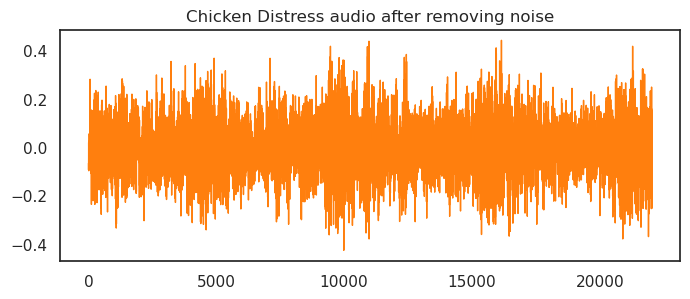

In [8]:
y_trimmed, _ = librosa.effects.trim(X['x'][0], top_db=20)
pd.Series(y_trimmed).plot(figsize=(8, 3),
                  lw=1,
                  title='Chicken Distress audio after removing noise',
                 color=color_pal[1])
plt.show()

In [10]:
df_x = pd.DataFrame(X['x'])

In [11]:
df_x['new'] = df_x.apply(lambda r: tuple(r), axis=1).apply(np.array)

In [14]:
index = np.arange(0, X['x'].shape[0], 1, dtype=int)

In [15]:
df = pd.DataFrame({'index':index, 'x':df_x['new'], 'y':X['y']})

In [16]:
df.head()

,index,x,y
0,0,"[-0.06526404619216919, -0.08445602655410767, -...",distressCall
1,1,"[-0.037854794412851334, -0.007295982912182808,...",naturalBarnSounds
2,2,"[0.004964637104421854, 0.02457590214908123, 0....",distressCall
3,3,"[-0.0470498688519001, -0.03123774752020836, 0....",naturalBarnSounds
4,4,"[0.054686564952135086, 0.0898560956120491, 0.0...",naturalBarnSounds


In [17]:
def save_img(row):
    S = librosa.feature.melspectrogram(y=row['x'],
                                   sr=22050,
                                   n_mels=128 * 2,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    fig, ax = plt.subplots(figsize=(4, 1.75), frameon=False)
    # Plot the mel spectogram
    img = librosa.display.specshow(S_db_mel,
                                x_axis='time',
                                y_axis='log',
                                ax=ax)
    ax.set_axis_off()
    if row['y']=='distressCall':
        file_name = "data/distressCall/"+str(row['index'])+".jpg"
    else:
        file_name = "data/naturalBarnSounds/"+str(row['index'])+".jpg"

    fig.savefig(file_name, bbox_inches='tight', transparent=True, pad_inches=0)
    plt.close(fig)

In [19]:
df.apply(save_img, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
5331    None
5332    None
5333    None
5334    None
5335    None
Length: 5336, dtype: object